In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
close = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col=1, parse_dates=True)

In [ ]:
btc = close[['Closing Price (USD)']].copy().dropna()

In [ ]:
btc.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


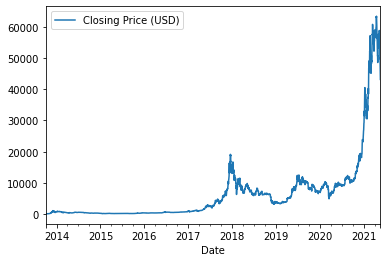

In [ ]:
btc.plot();

In [ ]:
btc_ret = np.log(btc.pct_change(1) + 1)

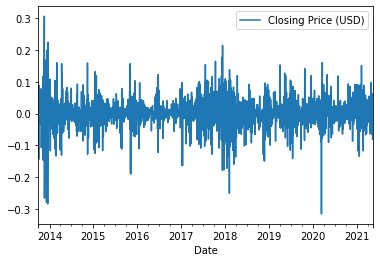

In [ ]:
btc_ret.plot();

In [ ]:
btc['SMA-10'] = btc['Closing Price (USD)'].rolling(10).mean()
btc.head(20)

,Closing Price (USD),SMA-10
Date,,
2013-10-01,123.65499,NaN
2013-10-02,125.45500,NaN
2013-10-03,108.58483,NaN
2013-10-04,118.67466,NaN
2013-10-05,121.33866,NaN
2013-10-06,120.65533,NaN
2013-10-07,121.79500,NaN
2013-10-08,123.03300,NaN
2013-10-09,124.04900,NaN


In [ ]:
type(btc['Closing Price (USD)'].rolling(10))

pandas.core.window.rolling.Rolling

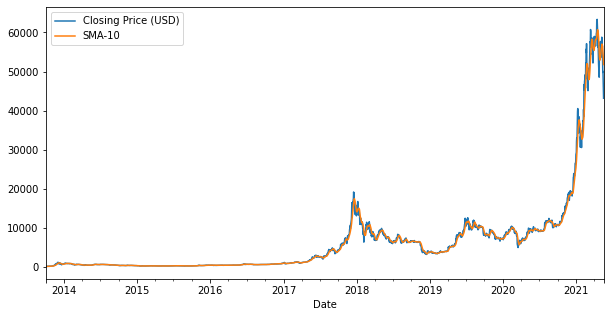

In [ ]:
btc.plot(figsize=(10, 5));

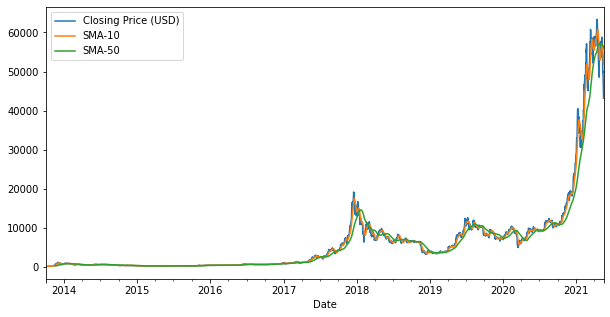

In [ ]:
btc['SMA-50'] = btc['Closing Price (USD)'].rolling(50).mean()
btc.plot(figsize=(10, 5));

In [ ]:
ClosingPrice_Open = close[['Closing Price (USD)', '24h Open (USD)']].copy().dropna()
cov = ClosingPrice_Open.rolling(50).cov()
cov

Closing Price (USD)  24h Open (USD)
Date                                                               
2013-10-01 Closing Price (USD)                  NaN             NaN
           24h Open (USD)                       NaN             NaN
2013-10-02 Closing Price (USD)                  NaN             NaN
           24h Open (USD)                       NaN             NaN
2013-10-03 Closing Price (USD)                  NaN             NaN
...                                             ...             ...
2021-05-16 24h Open (USD)              1.079249e+07    1.197770e+07
2021-05-17 Closing Price (USD)         1.528538e+07    1.293038e+07
           24h Open (USD)              1.293038e+07    1.386534e+07
2021-05-18 Closing Price (USD)         1.873340e+07    1.555798e+07
           24h Open (USD)              1.555798e+07    1.586747e+07

[5574 rows x 2 columns]

In [ ]:
cov.loc['2021-05-17'].to_numpy()

array([[15285380.36974012, 12930379.16319857],
       [12930379.16319857, 13865341.28788248]])

In [ ]:
ClosingPrice_Open_ret = np.log(1 + ClosingPrice_Open.pct_change(1))
ClosingPrice_Open_ret.head()

,Closing Price (USD),24h Open (USD)
Date,,
2013-10-01,NaN,NaN
2013-10-02,0.014452,-0.005240
2013-10-03,-0.144415,0.014452
2013-10-04,0.088854,-0.144415
2013-10-05,0.022200,0.088854


In [ ]:
ClosingPrice_Open_ret['Closing Price (USD)-SMA-50'] = ClosingPrice_Open_ret['Closing Price (USD)'].rolling(50).mean()
ClosingPrice_Open_ret['24h Open (USD)-SMA-50'] = ClosingPrice_Open_ret['24h Open (USD)'].rolling(50).mean()

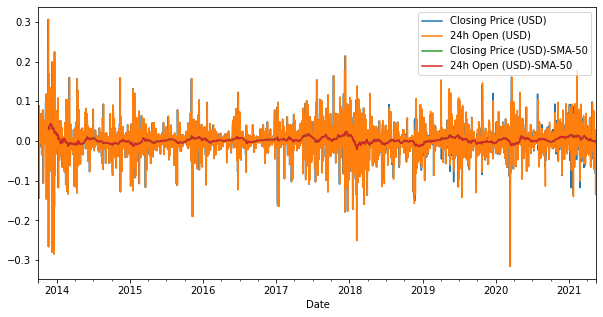

In [ ]:
ClosingPrice_Open_ret.plot(figsize=(10, 5));

In [ ]:
cov = ClosingPrice_Open_ret[['Closing Price (USD)-SMA-50', '24h Open (USD)-SMA-50']].rolling(50).cov()
cov.tail()

Closing Price (USD)-SMA-50  \
Date                                                                
2021-05-16 24h Open (USD)-SMA-50                         0.000006   
2021-05-17 Closing Price (USD)-SMA-50                    0.000007   
           24h Open (USD)-SMA-50                         0.000006   
2021-05-18 Closing Price (USD)-SMA-50                    0.000007   
           24h Open (USD)-SMA-50                         0.000007   

                                       24h Open (USD)-SMA-50  
Date                                                          
2021-05-16 24h Open (USD)-SMA-50                    0.000007  
2021-05-17 Closing Price (USD)-SMA-50               0.000006  
           24h Open (USD)-SMA-50                    0.000007  
2021-05-18 Closing Price (USD)-SMA-50               0.000007  
           24h Open (USD)-SMA-50                    0.000007

In [ ]:
corr = ClosingPrice_Open_ret[['Closing Price (USD)-SMA-50', '24h Open (USD)-SMA-50']].rolling(50).corr()
corr.tail(16)

Closing Price (USD)-SMA-50  \
Date                                                                
2021-05-11 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.950909   
2021-05-12 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.943453   
2021-05-13 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.933150   
2021-05-14 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.931383   
2021-05-15 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.929958   
2021-05-16 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.926774   
2021-05-17 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.925443   
2021-05-18 Closing Price (USD)-SMA-50                    1.000000   
           24h Open (USD)-SMA-50                         0.928289   

                                       24h Open (USD)-SMA-50  
Date                                                          
2021-05-11 Closing Price (USD)-SMA-50               0.950909  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-12 Closing Price (USD)-SMA-50               0.943453  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-13 Closing Price (USD)-SMA-50               0.933150  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-14 Closing Price (USD)-SMA-50               0.931383  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-15 Closing Price (USD)-SMA-50               0.929958  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-16 Closing Price (USD)-SMA-50               0.926774  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-17 Closing Price (USD)-SMA-50               0.925443  
           24h Open (USD)-SMA-50                    1.000000  
2021-05-18 Closing Price (USD)-SMA-50               0.928289  
           24h Open (USD)-SMA-50                    1.000000